In [20]:
%load_ext autoreload
%autoreload 2
import importlib
import numpy as np
from plots import *
from processing_funcs import *
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Load dataframe(s) and concatenate (with laptop=False this loads ALL the data with OSC paths)
laptop = True
df = load_df(laptop=False)

Loading York Data 1
Combining into one Dataframe!


In [17]:
# Get spectrum from waveforms
df = process_wfs(df)

In [18]:
def plot_supp(species=None, num=0, filepath=None, save=False):
    if filepath is None and species is not None:
        row = df[(df['species'] == species) & (df['sr'] == 0)].iloc[num]
    elif filepath is not None:
        row = df.loc[df['filepath'] == filepath].iloc[0]
    elif filepath is None and species is None:
        raise ValueError("We need either a filepath or a species!")
    freqs = row['freqs']
    spectrum = row['spectrum']
    path = Path(row['filepath'])
    species = row['species']
    plt.figure(num)
    plt.plot(freqs/1000, spectrum)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("dB SPL")
    title = f"{species} SOAE Spectrum ({path.name})"
    plt.title(title)
    if save:
        plt.savefig(path.name + ".png")
    plt.show()

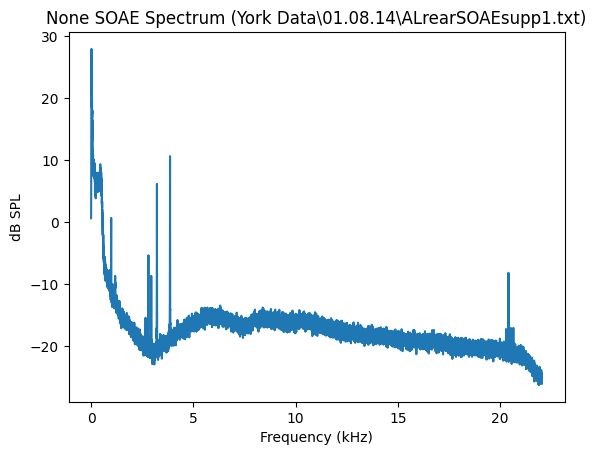

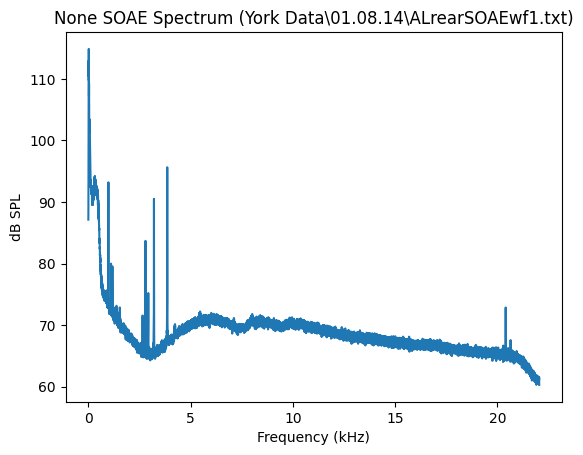

In [19]:
plot_supp(filepath=r"York Data\01.08.14\ALrearSOAEsupp1.txt")
plot_supp(filepath=r"York Data\01.08.14\ALrearSOAEwf1.txt")

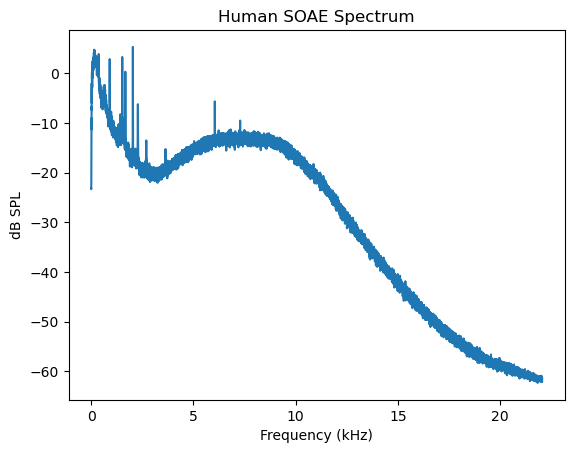

In [39]:
plot_supp("Human", 42, save=True)

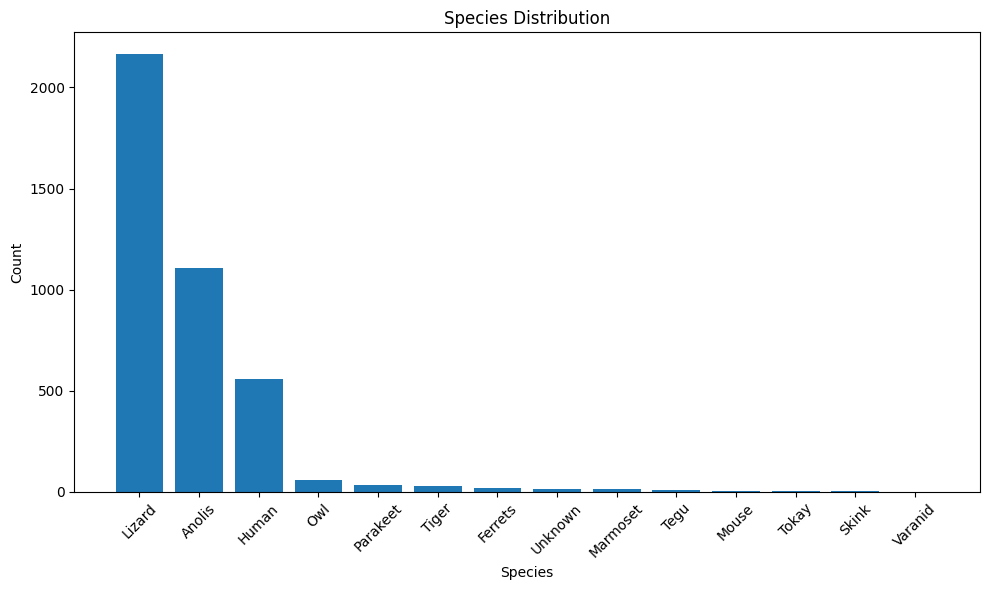

In [ ]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



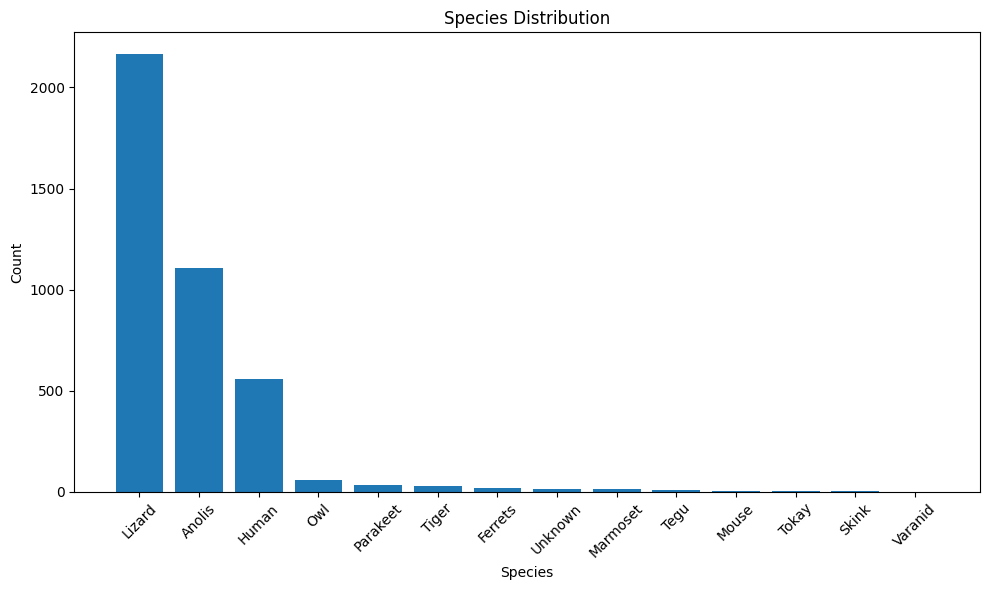

In [ ]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



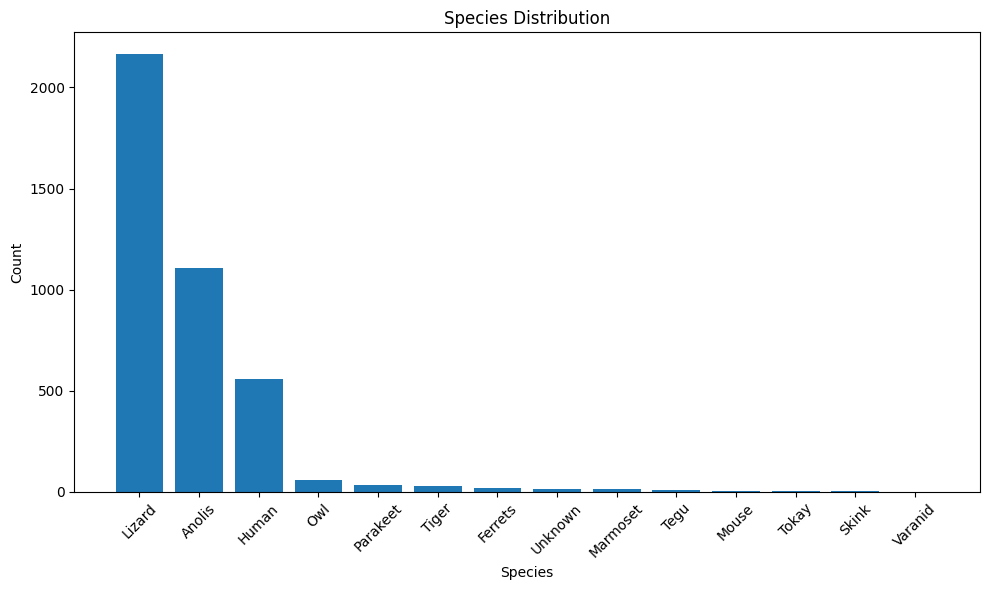

In [ ]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



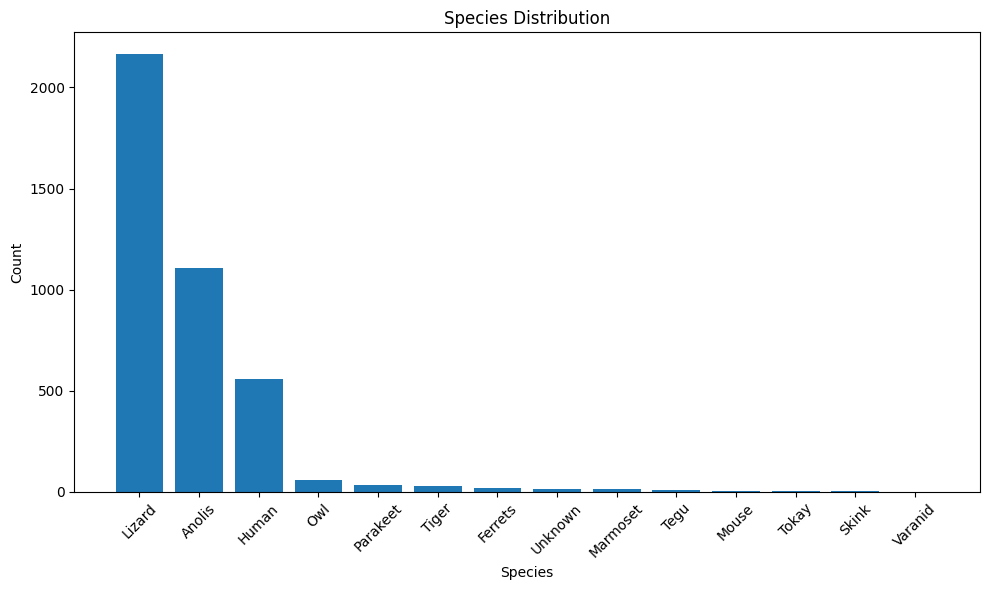

In [ ]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



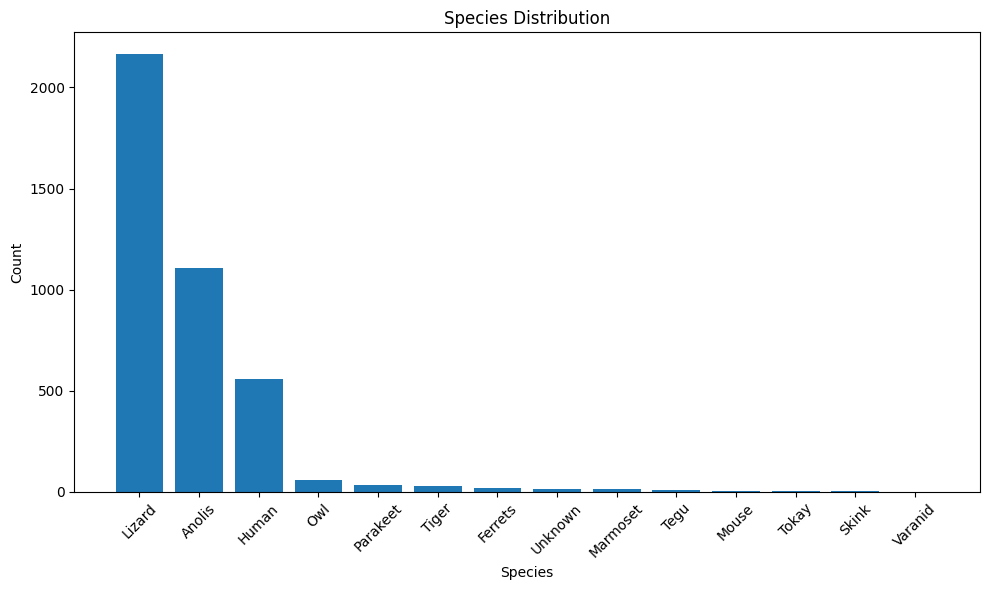

In [24]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



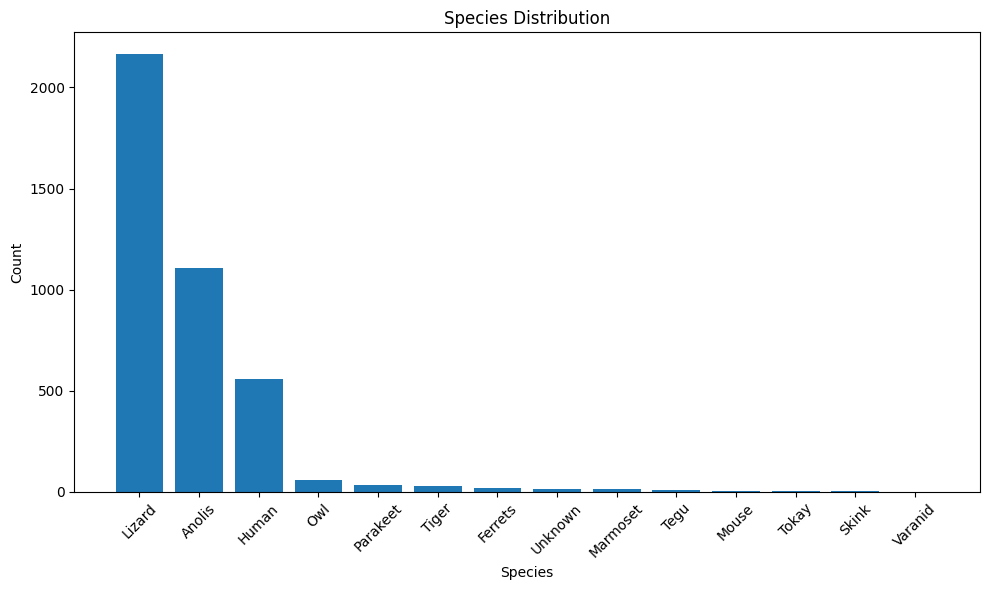

In [ ]:
# Get number of each species and plot in a bar chart
species_counts = df[df['species']!=""]['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('species_distribution.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()



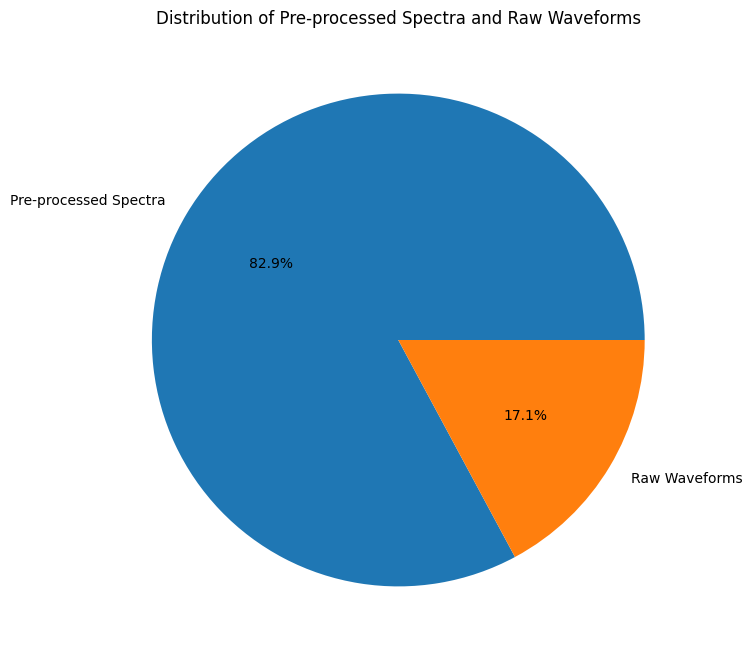

In [25]:
# Get how many are pre-processed
num_preprocessed = (df['sr'] == 0).sum()
num_wf = len(df) - num_preprocessed

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie([num_preprocessed, num_wf], labels=['Pre-processed Spectra', 'Raw Waveforms'], autopct='%1.1f%%')
plt.title('Distribution of Pre-processed Spectra and Raw Waveforms')
plt.savefig('pp vs wf.png', dpi=300, bbox_inches='tight')  # Adjust dpi and bounding box
plt.show()

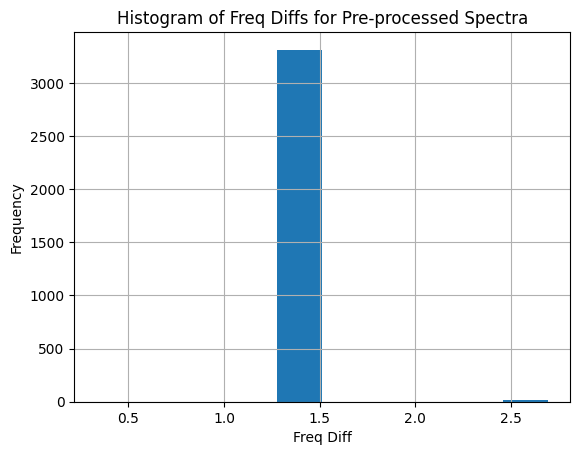

In [28]:
# Out of the preprocessed ones, get a histogram of the spacing between frequency bins
freq_diffs = df[df['sr'] == 0]['freqs'].apply(lambda x: x[100] - x[99])
freq_diffs.hist()
plt.title('Histogram of Freq Diffs for Pre-processed Spectra')
plt.xlabel('Freq Diff')
plt.ylabel('Frequency')
plt.show()

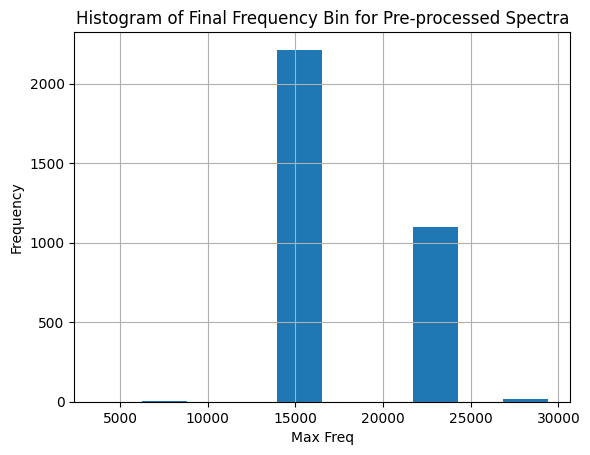

In [27]:
# Out of the preprocessed ones, get a histogram of the maximum frequency bin value
max_freqs = df[df['sr'] == 0]['freqs'].apply(lambda x: x[-1])
max_freqs.hist()
plt.title('Histogram of Final Frequency Bin for Pre-processed Spectra')
plt.xlabel('Max Freq')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_300/1345301533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['max_freq_category'] = max_freqs.apply(lambda x: '< 20000' if x < 20000 else '> 20000')


<Figure size 1200x600 with 0 Axes>

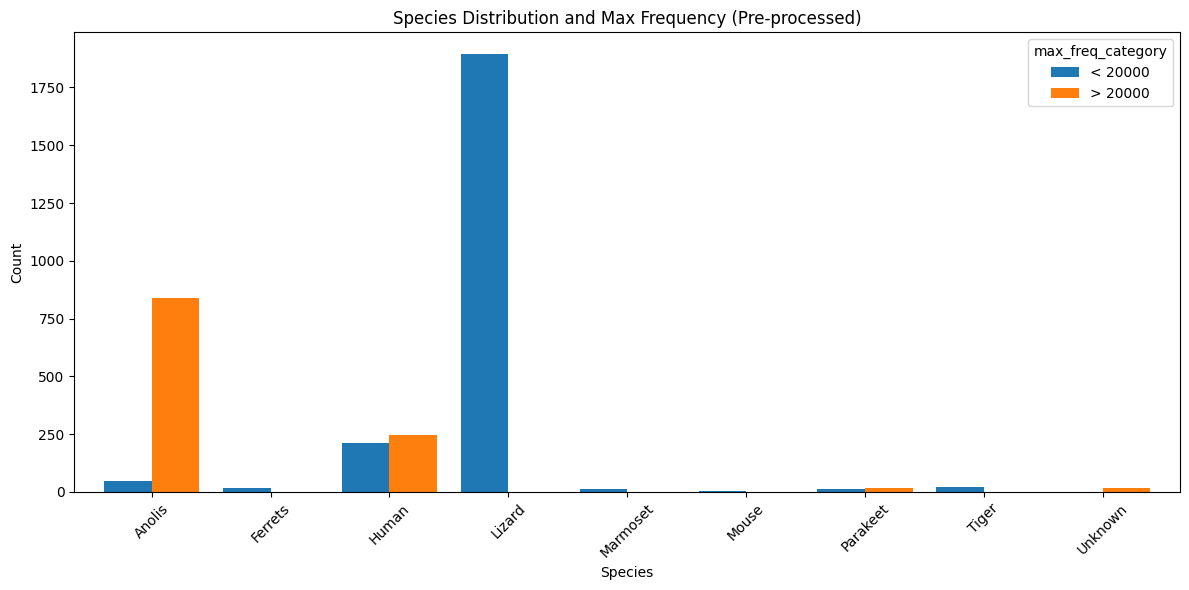

In [34]:
# Calculate max frequencies
df_supp = df[df['sr'] == 0]
max_freqs = df_supp['freqs'].apply(lambda x: x[-1])

# Add a new column to classify max frequencies into categories
df_supp['max_freq_category'] = max_freqs.apply(lambda x: '< 20000' if x < 20000 else '> 20000')

# Filter data for species with non-empty values
species_data = df_supp[df_supp['species'] != ""]

# Group data by species and max_freq_category, and count occurrences
grouped = species_data.groupby(['species', 'max_freq_category']).size().unstack(fill_value=0)

# Plot the double bar graph
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', width=0.8, figsize=(12, 6))

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution and Max Frequency (Pre-processed)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save and show the plot
plt.savefig('species_max_freq_double_bar.png', dpi=300, bbox_inches='tight')
plt.show()
